In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.io as pio

import plotly.express as px
pio.renderers.default = 'notebook'

# Lesson 6: Window Functions and Interactive Charts


## Dataset Overview from Hass Avocado Board 🥑:

- **Date** — date of observation  
- **AveragePrice** — average price of one avocado  
- **Total Volume** — total number of avocados sold  
- **4046** — number of PLU* 4046 avocados sold  
- **4225** — number of PLU 4225 avocados sold  
- **4770** — number of PLU 4770 avocados sold  
- **Total Bags** — total number of bags  
- **Small Bags** — small bags  
- **Large Bags** — large bags  
- **XLarge Bags** — extra-large bags  
- **type** — conventional or organic  
- **year** — year  
- **Region** — city or region of observation  

\*PLU: Product Lookup code

## The dataset contains weekly aggregated data rather than daily observations. Each date has multiple entries based on avocado type and sales region.

In [2]:
sns.set(
    font_scale = 2,
    style = "whitegrid",
    rc = {'figure.figsize': (20,7)})

## For this analysis, we aggregate data across all types and regions into `avocado_mean`.

In [3]:
avocado_mean = pd.read_csv("D:/курс_архив/my_files/lesson_6/avocado_mean.csv",
                           index_col=0, parse_dates=['Date'])

In [4]:
avocado_mean = avocado_mean.reset_index()

In [5]:
avocado_mean

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


## Task 1: Calculate Rolling Average for `AveragePrice`
### Calculate a rolling average with a window size of 3 for avocado prices. Identify the maximum value of the rolling average (rounded to 2 decimal places).

In [6]:
# Group data by date and calculate the daily average price.
first = avocado_mean.groupby('Date') \
    .agg({'AveragePrice': 'mean'}) \
    .sort_values('Date', ascending=True)  # Sort the data in ascending order by date.
first

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


In [7]:
# Apply a rolling average with a window of 3.
rolling_avg = first.rolling(window=3).mean()

In [8]:
# 4. Determine the maximum value of the rolling average and round it to 2 decimal places.
max_value = round(rolling_avg['AveragePrice'].max(), 2)
max_value

np.float64(1.85)

# Answer: 1.85

<Axes: xlabel='Date'>

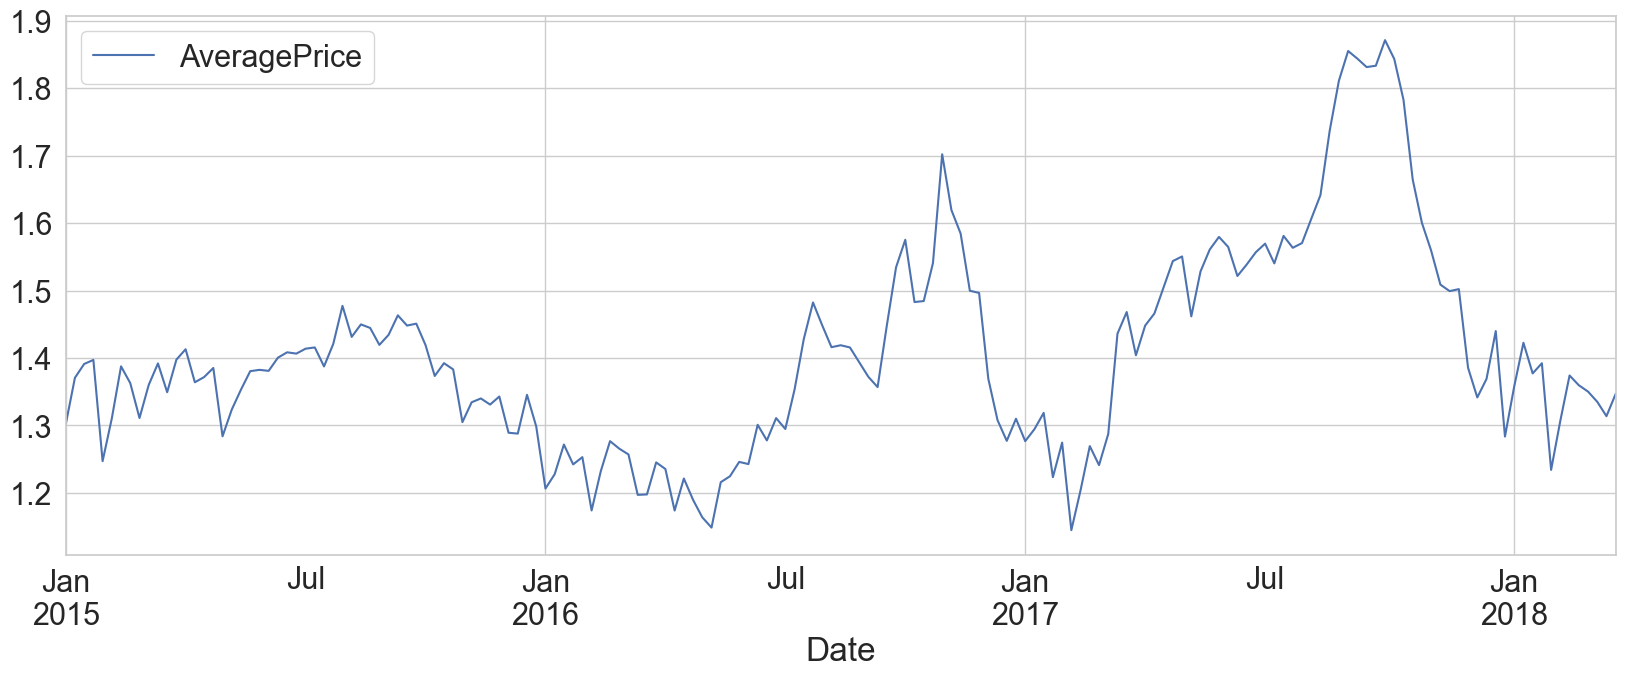

In [9]:
# Plot the rolling average for visualization.
first.plot()

## Task 2: Exponential Moving Average
### Using the aggregated data, apply the `ewm()` function with a `span` of 2 to calculate the exponential moving average (EMA). Save the result as `avocado_ewm`.

In [10]:
avocado_ewm = avocado_mean.AveragePrice.ewm(span=2).mean()
avocado_ewm

0      1.301296
1      1.353310
2      1.379480
3      1.391394
4      1.294758
         ...   
164    1.356212
165    1.352194
166    1.340793
167    1.322734
168    1.338812
Name: AveragePrice, Length: 169, dtype: float64

# Task 3 "Import the full dataset, specifying `index_col=0` (use the first column as the index)."

## For organic avocados (`type`) in Chicago (`region`), calculate the rolling average with a window of 4 and the exponential moving average with a `span` of 4.
## Plot the graphs, then fill in the gaps. Round the numbers to three decimal places.

In [11]:
# Import data from a CSV file, using the first column as the index
avocado_full = pd.read_csv('D:/курс_архив/my_files/lesson_6/avocado_full.csv',index_col=0)
avocado_full # Display the data for verification

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [12]:
# Reset the index so that the current index becomes a regular column, and new indices are assigned automatically
avocado_full = avocado_full.reset_index()
avocado_full # Display the data for verification after resetting the index

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
18245,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18246,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
18247,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [13]:
# Filter data for avocado type (organic) and region (Chicago)
# Group data by date and calculate the average price per day (AveragePrice)
# Apply a rolling mean with a 4-day window and round the result to 3 decimal places
# Sort the data by index (date)
first = avocado_full.query('type == "organic" and region == "Chicago"') \
    .groupby(['Date'])['AveragePrice'] \
    .mean() \
    .rolling(4).mean().round(3) \
    .sort_index()  # Sort by index (date)
first  # Display the result

Date
2015-01-04      NaN
2015-01-11      NaN
2015-01-18      NaN
2015-01-25    1.730
2015-02-01    1.738
              ...  
2018-02-25    1.652
2018-03-04    1.652
2018-03-11    1.655
2018-03-18    1.655
2018-03-25    1.658
Name: AveragePrice, Length: 169, dtype: float64

In [14]:
# Remove all rows with missing values after applying the rolling mean
first = first.dropna()

In [15]:
# Reset the index to convert it back into a regular column (return to the original structure)
first = first.reset_index()
first.query('Date == "2016-08-21"')# Find the record for the date August 21, 2016

,Date,AveragePrice
82,2016-08-21,2.102


In [16]:
# Convert the 'Date' column to datetime format so that dates are displayed correctly on the plot
first['Date'] = pd.to_datetime(first.Date) 

<Axes: xlabel='Date', ylabel='AveragePrice'>

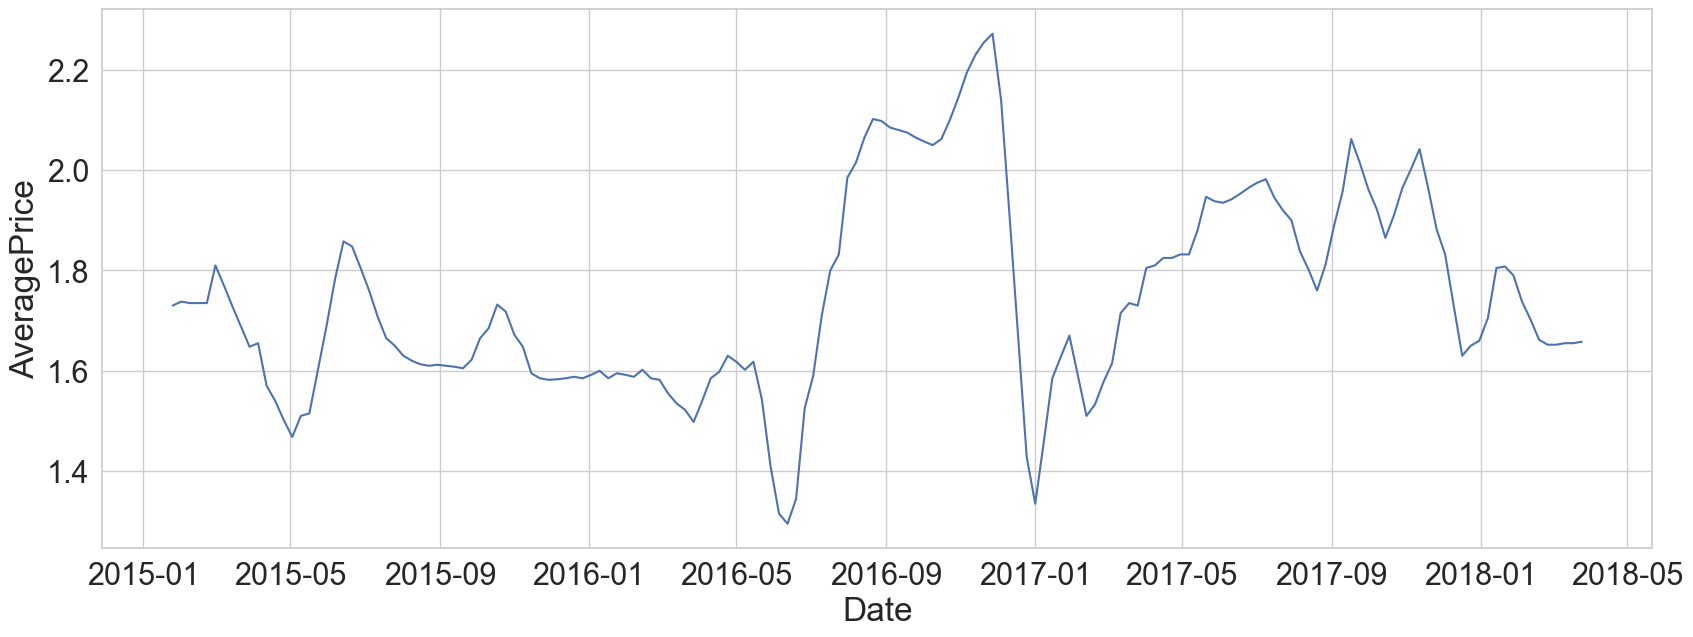

In [17]:
# Plot the line graph for the rolling mean
sns.lineplot(x='Date', y='AveragePrice', data=first)

In [18]:
# Repeat the process for exponential moving average:
# Filter data by avocado type (organic) and region (Chicago)
# Group data by date and calculate the average price per day (AveragePrice)
# Apply exponential moving average with span=4 and round to 3 decimal places
# Sort data by index (date)
second = avocado_full.query('type == "organic" and region == "Chicago"') \
    .groupby(['Date'])['AveragePrice'] \
    .mean() \
    .sort_index() \
    .ewm(span=4).mean().round(3)
second # Display the result

Date
2015-01-04    1.490
2015-01-11    1.678
2015-01-18    1.745
2015-01-25    1.784
2015-02-01    1.670
              ...  
2018-02-25    1.677
2018-03-04    1.654
2018-03-11    1.656
2018-03-18    1.658
2018-03-25    1.671
Name: AveragePrice, Length: 169, dtype: float64

In [19]:
# Removing all rows with missing values after applying the exponential moving average
second = second.dropna()

In [20]:
# Reset the index to convert the index into a regular column
second = second.reset_index()
second.query('Date == "2017-02-19"') # Search for the record on February 19, 2017

,Date,AveragePrice
111,2017-02-19,1.562


In [21]:
# Converting the 'Date' column to datetime format to ensure proper display of dates on the graph
second['Date'] = pd.to_datetime(second.Date)

<Axes: xlabel='Date', ylabel='AveragePrice'>

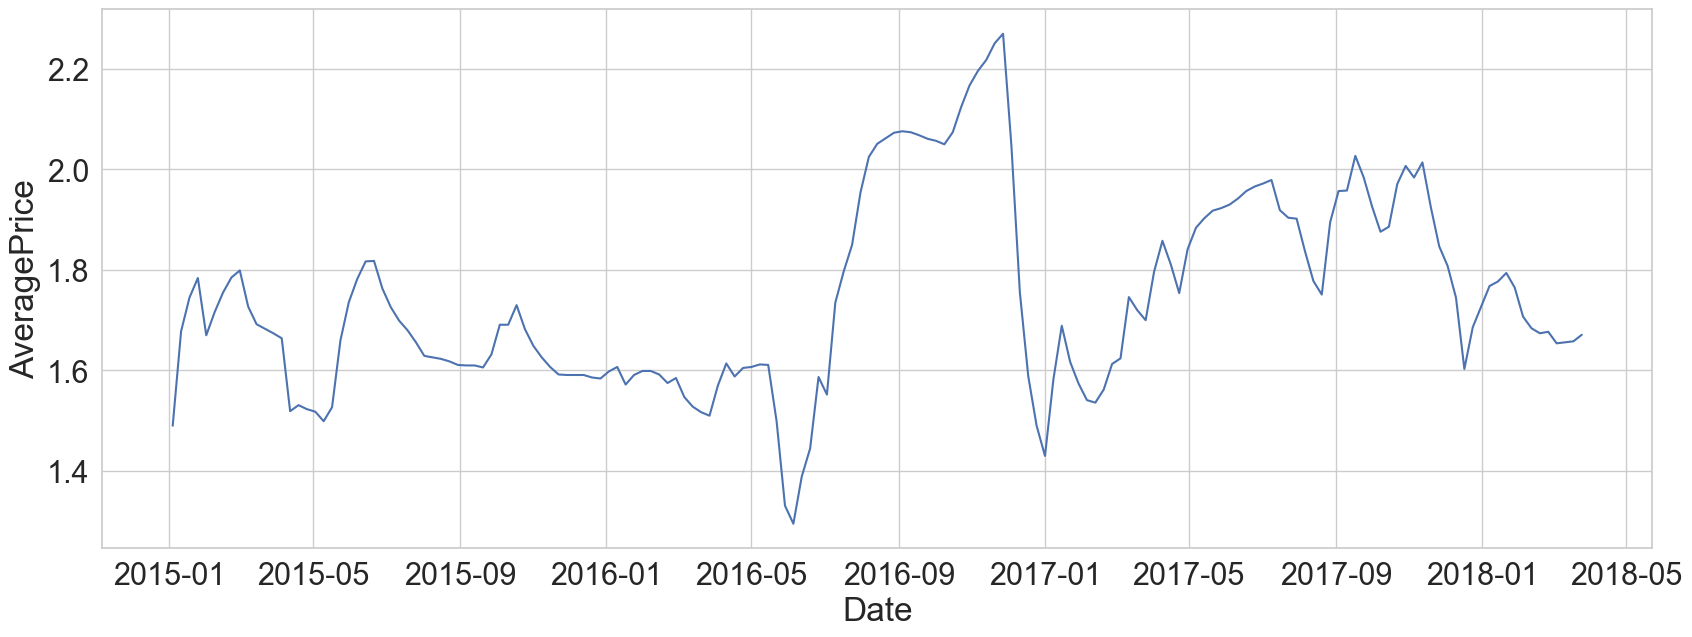

In [22]:
# Plotting a line graph for the exponential moving average (ewm)
sns.lineplot(x='Date', y='AveragePrice', data=second)

In [23]:
# Checking the value for February 19, 2017, in the exponential moving average data
first.query('Date == "2017-02-19"')

C:\Users\bedzh\AppData\Local\Temp\ipykernel_22416\684417183.py:2: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



,Date,AveragePrice
108,2017-02-19,1.533


# Conclusion: The series obtained using the EXPONENTIAL MOVING AVERAGE during the period from July 2016 to December 2016 is smoother. The average price for avocados on August 21, 2016, calculated with the rolling average, was 2.102, which is HIGHER than when using the exponential method. On February 19, 2017, the average obtained with ewm() was 1.562, and it was HIGHER than the rolling() method, which yielded 1.532.

# Task 4: Next, we will work with data on delays in closing deals.

## The file contains information about which companies made deals with whom and for what amount, but most importantly, how late they were.

### Read this data. Then, convert the delay column into timedelta format.

In [24]:
# Reading data from a CSV file
delay = pd.read_csv('D:/курс_архив/my_files/lesson_6/delays.csv')

In [25]:
# Viewing the first rows of the DataFrame
delay

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [26]:
# Checking the data types of each column
delay.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

In [27]:
# Removing possible "-" signs in the 'delay' column if the delay is negative
# This replaces negative values (negative time) with positive ones
delay['delay'] = delay.delay.str.replace('-', '')
delay # Viewing the DataFrame after the replacement

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48.000000000,705436
1,7614,9544,4 days 02:14:23.000000000,859266
2,2052,2427,0 days 06:08:57.000000000,812416
3,9635,8054,0 days 23:40:19.000000000,162312
4,8154,5503,1 days 13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08.000000000,602129
260,2384,2364,3 days 23:27:14.000000000,910660
261,5146,3331,1 days 15:22:34.000000000,401137
262,7203,5532,2 days 17:15:02.000000000,308979


In [28]:
# Converting values in the 'delay' column to the timedelta type for working with time intervals
delay['delay'] = pd.to_timedelta(delay.delay)
delay # Verifying the changes

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


In [29]:
delay.dtypes # Checking data types to ensure that 'delay' is now of type timedelta

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

# Task 5: Time intervals are useful, but we want to categorize them. Split the corresponding column into 3 intervals and place the values into the 'delay_categorical' column.

In [30]:
delay

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


In [31]:
# Converting time intervals to the number of days (as float)
delay['delay_in_days'] = delay['delay'].dt.total_seconds() / (24 * 3600)

In [32]:
# Using pd.cut() to split into 3 categories
bins = [0, 1, 2, 3]  # Defining the interval boundaries in days
labels = [1, 2, 3]  # Assigning labels for the categories

In [33]:
delay['delay_categorical'] = pd.cut(delay['delay_in_days'], bins=bins, labels=labels, right=True, include_lowest=True)

In [34]:
delay

,client_id,company_id,delay,revenue,delay_in_days,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1.623472,2
1,7614,9544,4 days 02:14:23,859266,4.093322,NaN
2,2052,2427,0 days 06:08:57,812416,0.256215,1
3,9635,8054,0 days 23:40:19,162312,0.986331,1
4,8154,5503,1 days 13:21:53,658844,1.556863,2
...,...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,0.230648,1
260,2384,2364,3 days 23:27:14,910660,3.977245,NaN
261,5146,3331,1 days 15:22:34,401137,1.640671,2
262,7203,5532,2 days 17:15:02,308979,2.718773,3


# Task 6: The categories are good, but we want more rounded values and human-readable labels. Use the arguments of the pd.cut() function to redefine the 'delay_categorical' column so that the values are:

### 'less than 1 day' – time from 0 to 1 day
### '1-2 days' – from 1 to 2 days
### '2-3 days' – from 2 to 3 days
### 'more than 3 days' – more than 3 days

In [35]:
delay['delay_categorical'] = pd.cut(delay.delay, bins=pd.to_timedelta(['0d', '1d', '2d', '3d', '106751 days 23:47:16.854775']), labels= ['less than 1 day',
                                                                                                      '1-2 days', 
                                                                                                      '2-3 days',
                                                                                                      'more than 3 days'])

In [36]:
delay

,client_id,company_id,delay,revenue,delay_in_days,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1.623472,1-2 days
1,7614,9544,4 days 02:14:23,859266,4.093322,more than 3 days
2,2052,2427,0 days 06:08:57,812416,0.256215,less than 1 day
3,9635,8054,0 days 23:40:19,162312,0.986331,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1.556863,1-2 days
...,...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,0.230648,less than 1 day
260,2384,2364,3 days 23:27:14,910660,3.977245,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1.640671,1-2 days
262,7203,5532,2 days 17:15:02,308979,2.718773,2-3 days


# Task 7: Now, create an interactive bar plot to show how often deals are delayed.

In [37]:
step10 = delay.groupby('delay_categorical', as_index=False) \
    .agg({'delay': 'count'}) \
    .sort_values('delay', ascending=False)
step10

C:\Users\bedzh\AppData\Local\Temp\ipykernel_22416\3685018166.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,delay_categorical,delay
3,more than 3 days,107
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47


C:\Users\bedzh\AppData\Local\Temp\ipykernel_22416\2971497776.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




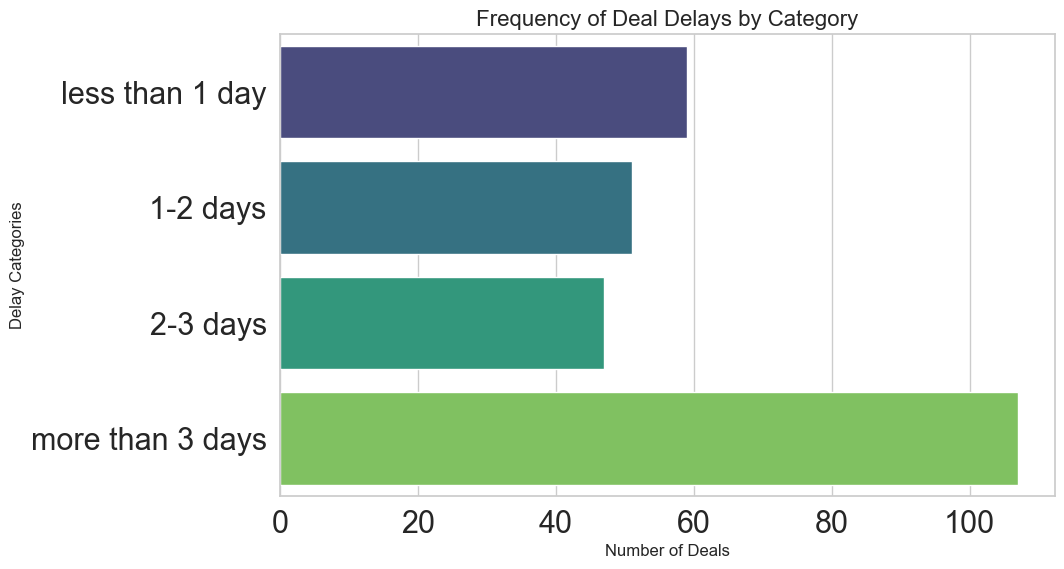

In [40]:
plt.figure(figsize=(10, 6))

# Creating a bar plot using seaborn
sns.barplot(x='delay', y='delay_categorical', data=step10, palette='viridis')

# Adding a title and axis labels
plt.title('Frequency of Deal Delays by Category', fontsize=16)
plt.xlabel('Number of Deals', fontsize=12)
plt.ylabel('Delay Categories', fontsize=12)

# Displaying the plot
plt.show()